In [82]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [83]:
dataHP = pd.read_csv('train_HP.csv')
dataHP.shape

(1460, 81)

In [84]:
dataHP.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Extraemos Columnas con NAN

In [85]:
dataHP['Alley'].isnull().mean()

0.9376712328767123

In [86]:
cols_con_na = [col for col in dataHP.columns if (dataHP[col].isnull().mean() > 0)]
cols_con_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [87]:
dataHP[cols_con_na].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [88]:
prop_nan_per_col = dataHP[cols_con_na].isnull().mean()
prop_nan_per_col

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [89]:
cols_rescatables = [col for col in dataHP.columns if (dataHP[col].isnull().mean() <= 0.05)]
cols_rescatables

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCond

### Complete Case Analysis (CCA)

In [90]:
#dejamos solo las columnas que tiene casos completos, es decir no tienen ningún nulo.
data_HP_noNAN = dataHP[cols_rescatables].dropna()
dataHP.shape, data_HP_noNAN.shape

((1460, 81), (1412, 70))

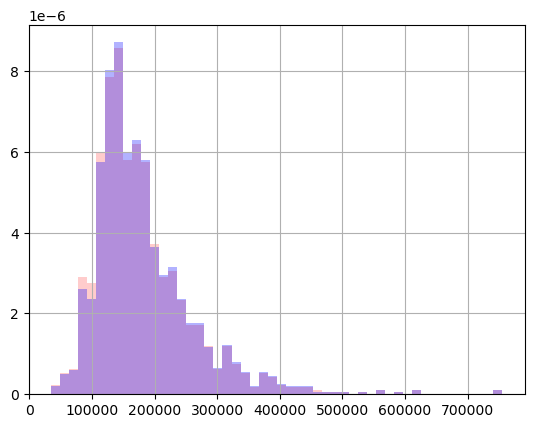

In [91]:
dataHP['SalePrice'].hist(bins=50, density=True, color='red', alpha=0.2)
data_HP_noNAN['SalePrice'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

#### Imputación de Media y Mediana

In [92]:
dataTitanic = pd.read_csv('titanic.csv')
dataTitanic = dataTitanic[['Survived', 'Age', 'Fare']]
dataTitanic.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [93]:
dataTitanic.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [94]:
media = dataTitanic['Age'].mean()
mediana = dataTitanic['Age'].median()

print(f"Media: {media}")
print(f"Median: {mediana}")

Media: 29.69911764705882
Median: 28.0


In [95]:
dataTitanic['Age_Mean'] = np.round(dataTitanic['Age'].fillna(media))
dataTitanic['Age_Median'] = np.round(dataTitanic['Age'].fillna(mediana))

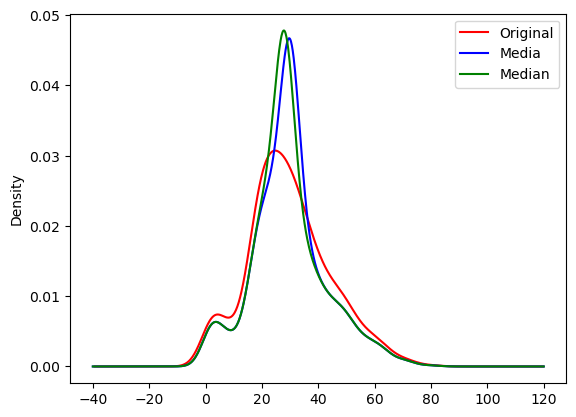

In [96]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataTitanic['Age'].plot.density(color='red', label='Original')
dataTitanic['Age_Mean'].plot.density(color='blue', label='Media')
dataTitanic['Age_Median'].plot.density(color='green', label='Median')
ax.legend()

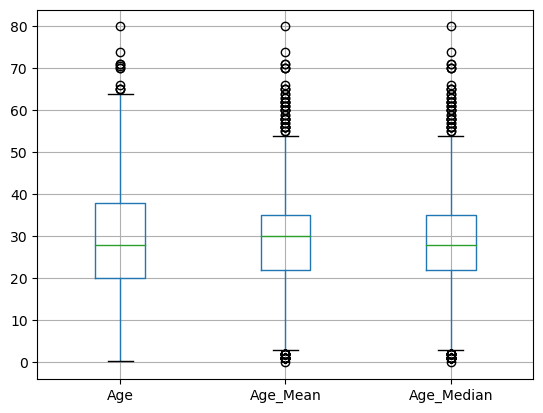

In [97]:
dataTitanic[['Age', 'Age_Mean', 'Age_Median']].boxplot()
plt.show()

##### Imputación Categórica

In [98]:
dataset_cat_missing = dataHP[['BsmtQual', 'FireplaceQu', 'SalePrice']]
dataset_cat_missing.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [99]:
dataset_cat_missing.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

In [100]:
dataset_cat_missing['BsmtQual'].value_counts()/len(dataset_cat_missing)

TA    0.444521
Gd    0.423288
Ex    0.082877
Fa    0.023973
Name: BsmtQual, dtype: float64

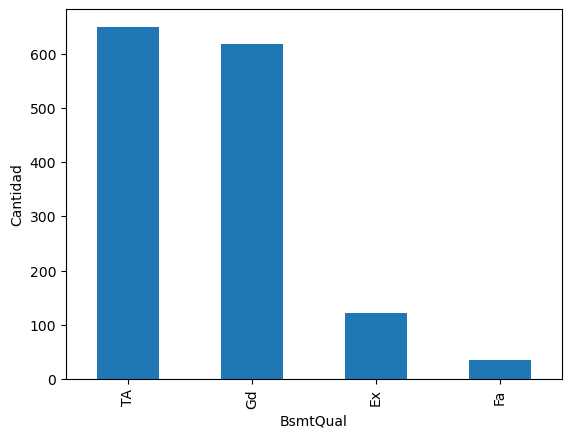

In [101]:
dataset_cat_missing['BsmtQual'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("BsmtQual")
plt.show()

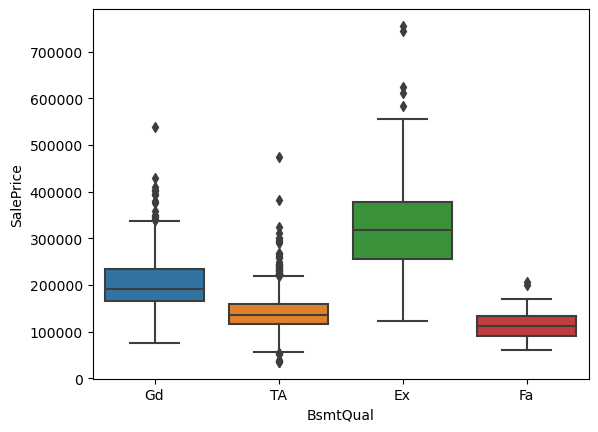

In [102]:
import seaborn as sns
sns.boxplot(x=dataset_cat_missing['BsmtQual'], y = dataset_cat_missing['SalePrice'])
plt.show()

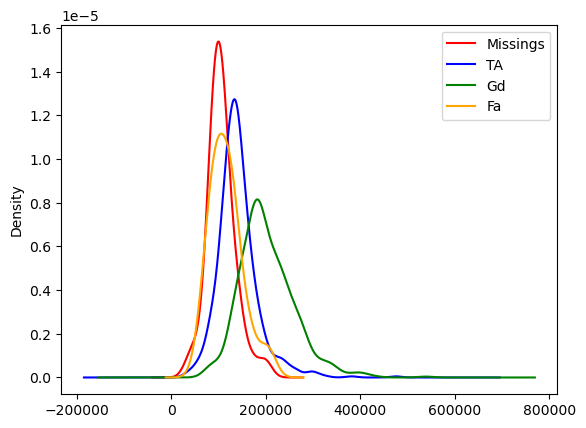

In [103]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['BsmtQual'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'TA']['SalePrice'].plot(kind="kde", color="blue", label="TA")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'Gd']['SalePrice'].plot(kind="kde", color="green", label="Gd")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'Fa']['SalePrice'].plot(kind="kde", color="orange", label="Fa")
ax.legend()
plt.show()

In [104]:
dataset_cat_missing['BsmtQual'].fillna('Fa', inplace=True) #imputación de variable categorica.

C:\Users\Jose L\AppData\Local\Temp\ipykernel_10916\3665160481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cat_missing['BsmtQual'].fillna('Fa', inplace=True) #imputación de variable categorica.


In [105]:
dataset_cat_missing['FireplaceQu'].value_counts()/len(dataset_cat_missing)

Gd    0.260274
TA    0.214384
Fa    0.022603
Ex    0.016438
Po    0.013699
Name: FireplaceQu, dtype: float64

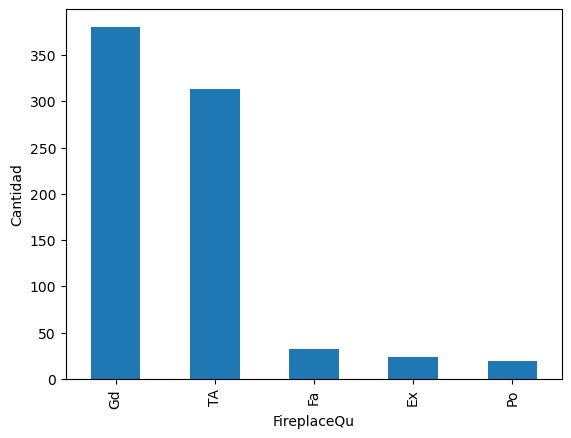

In [106]:
dataset_cat_missing['FireplaceQu'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("FireplaceQu")
plt.show()

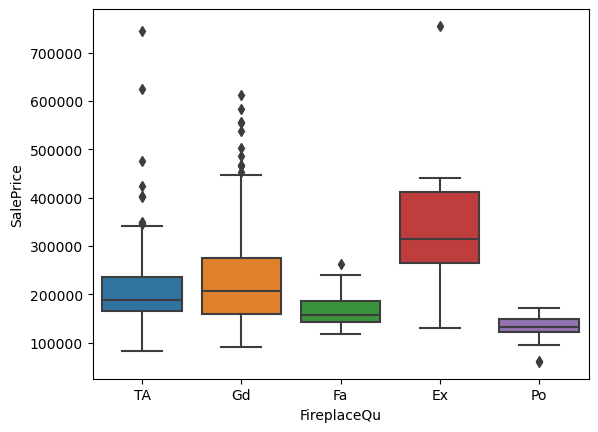

In [107]:
sns.boxplot(x=dataset_cat_missing['FireplaceQu'], y = dataset_cat_missing['SalePrice'])
plt.show()

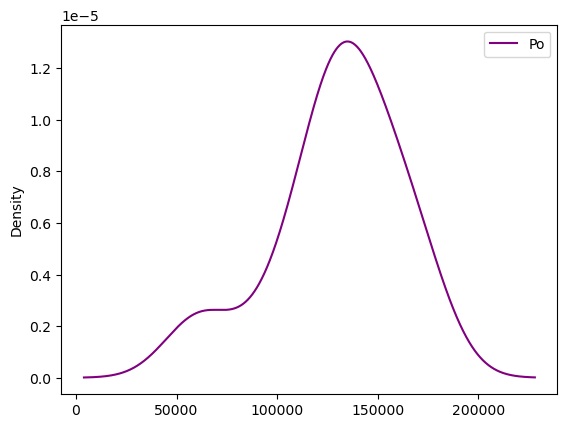

In [108]:
fig = plt.figure()
ax = fig.add_subplot(111)
#dataset_cat_missing[dataset_cat_missing['FireplaceQu'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['FireplaceQu'] == 'Po']['SalePrice'].plot(kind="kde", color="purple", label="Po")
ax.legend()
plt.show()

In [109]:
dataset_cat_missing['FireplaceQu'].fillna('Po', inplace=True) #imputación de variable categorica.

C:\Users\Jose L\AppData\Local\Temp\ipykernel_10916\2447914322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cat_missing['FireplaceQu'].fillna('Po', inplace=True) #imputación de variable categorica.


### Codifcación de Variables Categóticas

In [110]:
def getCategoryVars(dataset):
     cat_colnames = []
     colnames = dataset.columns
     for col in colnames:
          if(dataset[col].dtype == 'object'):
               cat_colnames.append(col)
     return cat_colnames

In [111]:
cat_cols = getCategoryVars(dataHP)
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [112]:
cat_cols.append('SalePrice')

In [113]:
dataset_categories = dataHP[cat_cols]
dataset_categories.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000


In [114]:
dataset_categories['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [115]:
pd.get_dummies(dataset_categories['MSZoning'])

,C (all),FV,RH,RL,RM
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
1455,0,0,0,1,0
1456,0,0,0,1,0
1457,0,0,0,1,0
1458,0,0,0,1,0


In [116]:
dataset_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [117]:
dfTemp = pd.get_dummies(dataset_categories)
dfTemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 253 entries, SalePrice to SaleCondition_Partial
dtypes: int64(1), uint8(252)
memory usage: 370.8 KB


In [118]:
##Frequency Encoding

dataset_categories['KitchenQual'].value_counts().sort_values(ascending=False)

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

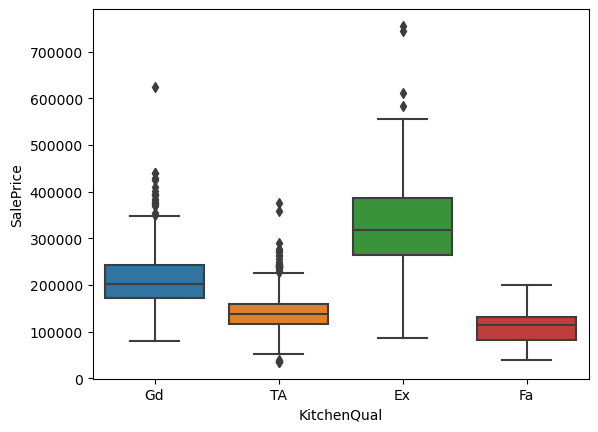

In [119]:
sns.boxplot(x=dataset_categories['KitchenQual'], y=dataset_categories['SalePrice'])
plt.show()

In [120]:
kitchenQual_freq_mapper = (dataset_categories['KitchenQual'].value_counts().sort_values(ascending=False)).to_dict()
kitchenQual_freq_mapper

{'TA': 735, 'Gd': 586, 'Ex': 100, 'Fa': 39}

In [121]:
dataset_categories['KitchenQual_code'] = dataset_categories['KitchenQual'].map(kitchenQual_freq_mapper)
dataset_categories[['KitchenQual', 'KitchenQual_code']]

C:\Users\Jose L\AppData\Local\Temp\ipykernel_10916\2788374200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['KitchenQual_code'] = dataset_categories['KitchenQual'].map(kitchenQual_freq_mapper)


,KitchenQual,KitchenQual_code
0,Gd,586
1,TA,735
2,Gd,586
3,Gd,586
4,Gd,586
...,...,...
1455,TA,735
1456,TA,735
1457,Gd,586
1458,Gd,586


## Tarea Jose Lara

### Numero de columnas con NAN 

In [122]:
len(cols_con_na)

19

### Listado de columnas con NAN 

In [123]:
list(cols_con_na)

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

### Dataframe de columnas con NaN

In [124]:
datasettarea = dataHP[cols_con_na]
datasettarea.head()

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN


### Saber si los datos son categoricos o numeros

In [125]:
datasettarea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

### Las columas a utilizar para las tareas son: [MasVnrType], [MasVnrArea], [BsmtQual], [BsmtCond], [BsmtExposure], [BsmtFinType1], [BsmtFinType2], [Electrical] ya que cumplen con la caractesitica que los nulos no son mayor a 5%

In [126]:
promedio_cols_con_na = dataHP[cols_con_na].isnull().mean() < 0.05
promedio_cols_con_na

LotFrontage     False
Alley           False
MasVnrType       True
MasVnrArea       True
BsmtQual         True
BsmtCond         True
BsmtExposure     True
BsmtFinType1     True
BsmtFinType2     True
Electrical       True
FireplaceQu     False
GarageType      False
GarageYrBlt     False
GarageFinish    False
GarageQual      False
GarageCond      False
PoolQC          False
Fence           False
MiscFeature     False
dtype: bool

### Tipo de datos y promedio de nulos de las columnas a utilizar 

In [127]:
info_columnas = pd.concat([datasettarea[['MasVnrType', 'MasVnrArea','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical']].isnull().mean(), 
datasettarea[['MasVnrType', 'MasVnrArea','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical']].dtypes], axis=1)
info_columnas

,0,1
MasVnrType,0.005479,object
MasVnrArea,0.005479,float64
BsmtQual,0.025342,object
BsmtCond,0.025342,object
BsmtExposure,0.026027,object
BsmtFinType1,0.025342,object
BsmtFinType2,0.026027,object
Electrical,0.000685,object


# Imputación de Media y Mediana MasVnrArea

In [128]:
media_MasVnrArea = datasettarea['MasVnrArea'].mean()
mediana_MasVnrArea = datasettarea['MasVnrArea'].median()

print(f"Media: {media_MasVnrArea}")
print(f"Median: {mediana_MasVnrArea}")

Media: 103.68526170798899
Median: 0.0


In [129]:
datasettarea['MasVnrArea_Mean'] = np.round(datasettarea['MasVnrArea'].fillna(media_MasVnrArea))
datasettarea['MasVnrArea_Median'] = np.round(datasettarea['MasVnrArea'].fillna(mediana_MasVnrArea))

C:\Users\Jose L\AppData\Local\Temp\ipykernel_10916\1818142158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasettarea['MasVnrArea_Mean'] = np.round(datasettarea['MasVnrArea'].fillna(media_MasVnrArea))
C:\Users\Jose L\AppData\Local\Temp\ipykernel_10916\1818142158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasettarea['MasVnrArea_Median'] = np.round(datasettarea['MasVnrArea'].fillna(mediana_MasVnrArea))


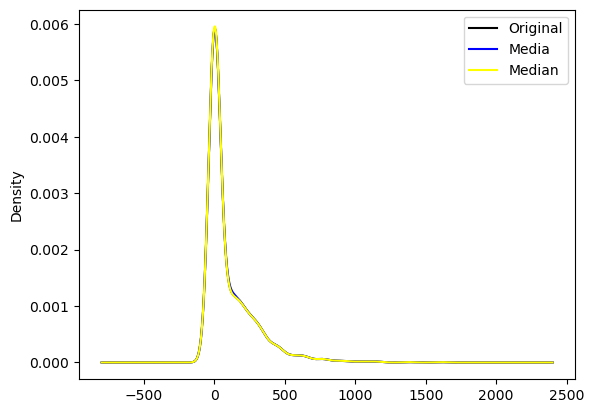

In [130]:
fig = plt.figure()
ax = fig.add_subplot(111)

datasettarea['MasVnrArea'].plot.density(color='black', label='Original')
datasettarea['MasVnrArea_Mean'].plot.density(color='blue', label='Media')
datasettarea['MasVnrArea_Median'].plot.density(color='yellow', label='Median')
ax.legend()

# Imputación Categórica MasVnrType

In [131]:
datasettarea['MasVnrType'].value_counts()/len(datasettarea)

None       0.591781
BrkFace    0.304795
Stone      0.087671
BrkCmn     0.010274
Name: MasVnrType, dtype: float64

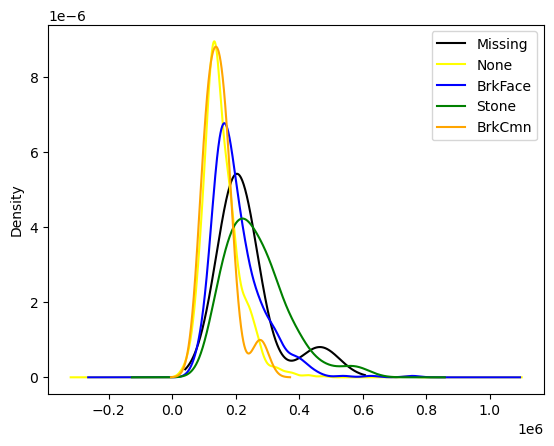

In [132]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_categories[dataset_categories['MasVnrType'].isnull()]['SalePrice'].plot(kind="kde", color="black", label="Missing")
dataset_categories[dataset_categories['MasVnrType'] == 'None']['SalePrice'].plot(kind="kde", color="yellow", label="None")
dataset_categories[dataset_categories['MasVnrType'] == 'BrkFace']['SalePrice'].plot(kind="kde", color="blue", label="BrkFace")
dataset_categories[dataset_categories['MasVnrType'] == 'Stone']['SalePrice'].plot(kind="kde", color="green", label="Stone")
dataset_categories[dataset_categories['MasVnrType'] == 'BrkCmn']['SalePrice'].plot(kind="kde", color="orange", label="BrkCmn")
ax.legend()
plt.show()

In [142]:
dataset_categories['MasVnrType'].fillna('Stone', inplace=True) #imputación de variable categorica.

C:\Users\Jose L\AppData\Local\Temp\ipykernel_10916\3202741451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['MasVnrType'].fillna('Stone', inplace=True) #imputación de variable categorica.


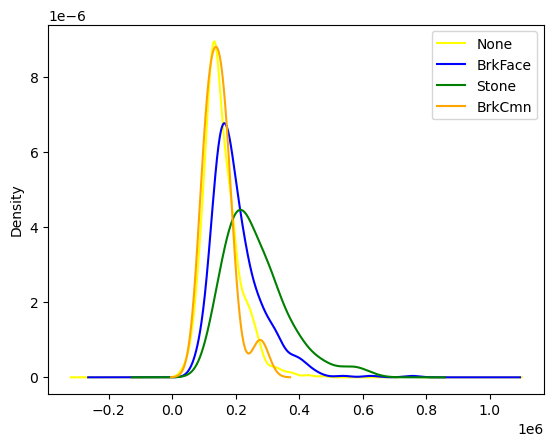

In [144]:
fig = plt.figure()
ax = fig.add_subplot(111)
#dataset_categories[dataset_categories['MasVnrType'].isnull()]['SalePrice'].plot(kind="kde", color="black", label="Missing")
dataset_categories[dataset_categories['MasVnrType'] == 'None']['SalePrice'].plot(kind="kde", color="yellow", label="None")
dataset_categories[dataset_categories['MasVnrType'] == 'BrkFace']['SalePrice'].plot(kind="kde", color="blue", label="BrkFace")
dataset_categories[dataset_categories['MasVnrType'] == 'Stone']['SalePrice'].plot(kind="kde", color="green", label="Stone")
dataset_categories[dataset_categories['MasVnrType'] == 'BrkCmn']['SalePrice'].plot(kind="kde", color="orange", label="BrkCmn")
ax.legend()
plt.show()

### Converir la categoria a tipo numerico

In [149]:
dataset_categories['MasVnrType'].value_counts().sort_values(ascending=False)

None       864
BrkFace    445
Stone      136
BrkCmn      15
Name: MasVnrType, dtype: int64

In [151]:
MasVnrType_freq_mapper = (datasettarea['MasVnrType'].value_counts().sort_values(ascending=False)).to_dict()
MasVnrType_freq_mapper

{'None': 864, 'BrkFace': 445, 'Stone': 136, 'BrkCmn': 15}

In [152]:
datasettarea['MasVnrType_code'] = datasettarea['MasVnrType'].map(MasVnrType_freq_mapper)
datasettarea[['MasVnrType', 'MasVnrType_code']]

C:\Users\Jose L\AppData\Local\Temp\ipykernel_10916\2204877104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasettarea['MasVnrType_code'] = datasettarea['MasVnrType'].map(MasVnrType_freq_mapper)


,MasVnrType,MasVnrType_code
0,BrkFace,445
1,None,864
2,BrkFace,445
3,None,864
4,BrkFace,445
...,...,...
1455,None,864
1456,Stone,136
1457,None,864
1458,None,864


# Imputación Categórica BsmtQual

In [153]:
datasettarea['BsmtQual'].value_counts()/len(datasettarea)

TA    0.444521
Gd    0.423288
Ex    0.082877
Fa    0.023973
Name: BsmtQual, dtype: float64

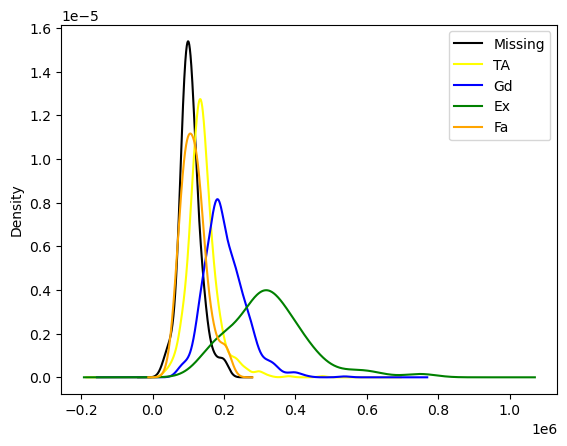

In [154]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_categories[dataset_categories['BsmtQual'].isnull()]['SalePrice'].plot(kind="kde", color="black", label="Missing")
dataset_categories[dataset_categories['BsmtQual'] == 'TA']['SalePrice'].plot(kind="kde", color="yellow", label="TA")
dataset_categories[dataset_categories['BsmtQual'] == 'Gd']['SalePrice'].plot(kind="kde", color="blue", label="Gd")
dataset_categories[dataset_categories['BsmtQual'] == 'Ex']['SalePrice'].plot(kind="kde", color="green", label="Ex")
dataset_categories[dataset_categories['BsmtQual'] == 'Fa']['SalePrice'].plot(kind="kde", color="orange", label="Fa")
ax.legend()
plt.show()

In [155]:
dataset_categories['BsmtQual'].fillna('Fa', inplace=True) #imputación de variable categorica.

C:\Users\Jose L\AppData\Local\Temp\ipykernel_10916\3556563622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['BsmtQual'].fillna('Fa', inplace=True) #imputación de variable categorica.


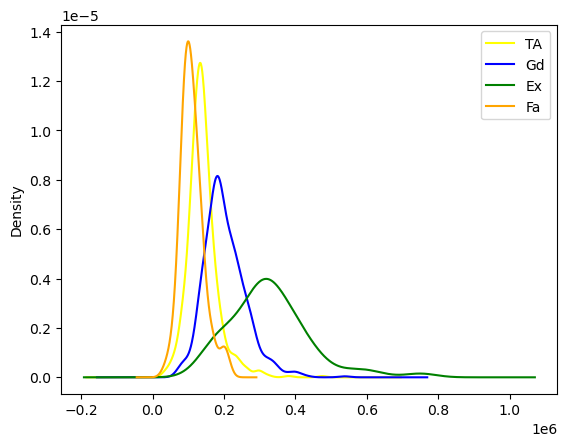

In [156]:
fig = plt.figure()
ax = fig.add_subplot(111)

#dataset_categories[dataset_categories['BsmtQual'].isnull()]['SalePrice'].plot(kind="kde", color="black", label="Missing")
dataset_categories[dataset_categories['BsmtQual'] == 'TA']['SalePrice'].plot(kind="kde", color="yellow", label="TA")
dataset_categories[dataset_categories['BsmtQual'] == 'Gd']['SalePrice'].plot(kind="kde", color="blue", label="Gd")
dataset_categories[dataset_categories['BsmtQual'] == 'Ex']['SalePrice'].plot(kind="kde", color="green", label="Ex")
dataset_categories[dataset_categories['BsmtQual'] == 'Fa']['SalePrice'].plot(kind="kde", color="orange", label="Fa")
ax.legend()
plt.show()

### Converir la categoria a tipo numerico

In [157]:
dataset_categories['BsmtQual'].value_counts().sort_values(ascending=False)

TA    649
Gd    618
Ex    121
Fa     72
Name: BsmtQual, dtype: int64

In [158]:
BsmtQual_freq_mapper = (datasettarea['BsmtQual'].value_counts().sort_values(ascending=False)).to_dict()
BsmtQual_freq_mapper

{'TA': 649, 'Gd': 618, 'Ex': 121, 'Fa': 35}

In [168]:
datasettarea['BsmtQual_code'] = datasettarea['BsmtQual'].map(BsmtQual_freq_mapper)
datasettarea[['BsmtQual', 'BsmtQual_code']]

C:\Users\Jose L\AppData\Local\Temp\ipykernel_10916\1524939700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasettarea['BsmtQual_code'] = datasettarea['BsmtQual'].map(BsmtQual_freq_mapper)


,BsmtQual,BsmtQual_code
0,Gd,618.0
1,Gd,618.0
2,Gd,618.0
3,TA,649.0
4,Gd,618.0
...,...,...
1455,Gd,618.0
1456,Gd,618.0
1457,TA,649.0
1458,TA,649.0


# Imputación Categórica BsmtCond

In [160]:
datasettarea['BsmtCond'].value_counts()/len(datasettarea)

TA    0.897945
Gd    0.044521
Fa    0.030822
Po    0.001370
Name: BsmtCond, dtype: float64

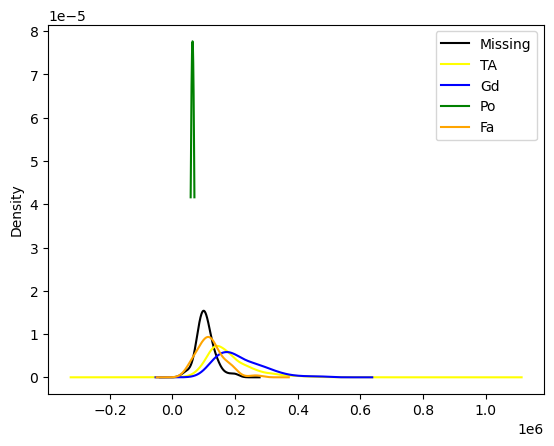

In [162]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_categories[dataset_categories['BsmtCond'].isnull()]['SalePrice'].plot(kind="kde", color="black", label="Missing")
dataset_categories[dataset_categories['BsmtCond'] == 'TA']['SalePrice'].plot(kind="kde", color="yellow", label="TA")
dataset_categories[dataset_categories['BsmtCond'] == 'Gd']['SalePrice'].plot(kind="kde", color="blue", label="Gd")
dataset_categories[dataset_categories['BsmtCond'] == 'Po']['SalePrice'].plot(kind="kde", color="green", label="Po")
dataset_categories[dataset_categories['BsmtCond'] == 'Fa']['SalePrice'].plot(kind="kde", color="orange", label="Fa")
ax.legend()
plt.show()

In [163]:
dataset_categories['BsmtCond'].fillna('Fa', inplace=True) #imputación de variable categorica.

C:\Users\Jose L\AppData\Local\Temp\ipykernel_10916\3123285411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['BsmtCond'].fillna('Fa', inplace=True) #imputación de variable categorica.


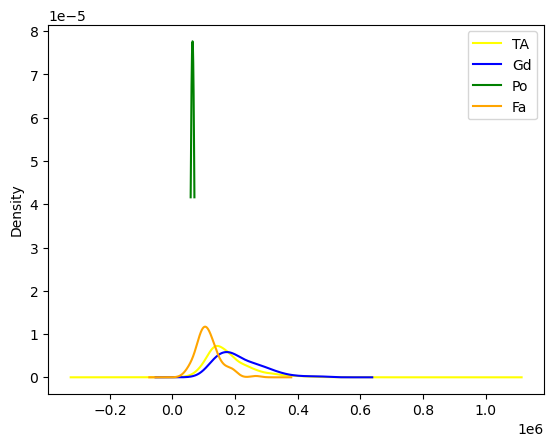

In [164]:
fig = plt.figure()
ax = fig.add_subplot(111)

#dataset_categories[dataset_categories['BsmtCond'].isnull()]['SalePrice'].plot(kind="kde", color="black", label="Missing")
dataset_categories[dataset_categories['BsmtCond'] == 'TA']['SalePrice'].plot(kind="kde", color="yellow", label="TA")
dataset_categories[dataset_categories['BsmtCond'] == 'Gd']['SalePrice'].plot(kind="kde", color="blue", label="Gd")
dataset_categories[dataset_categories['BsmtCond'] == 'Po']['SalePrice'].plot(kind="kde", color="green", label="Po")
dataset_categories[dataset_categories['BsmtCond'] == 'Fa']['SalePrice'].plot(kind="kde", color="orange", label="Fa")
ax.legend()
plt.show()

### Converir la categoria a tipo numerico

In [165]:
dataset_categories['BsmtCond'].value_counts().sort_values(ascending=False)

TA    1311
Fa      82
Gd      65
Po       2
Name: BsmtCond, dtype: int64

In [169]:
BsmtCond_freq_mapper = (datasettarea['BsmtCond'].value_counts().sort_values(ascending=False)).to_dict()
BsmtCond_freq_mapper

{'TA': 1311, 'Gd': 65, 'Fa': 45, 'Po': 2}

In [171]:
datasettarea['BsmtCond_code'] = datasettarea['BsmtCond'].map(BsmtCond_freq_mapper)
datasettarea[['BsmtCond', 'BsmtCond_code']]

C:\Users\Jose L\AppData\Local\Temp\ipykernel_10916\3091273078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasettarea['BsmtCond_code'] = datasettarea['BsmtCond'].map(BsmtCond_freq_mapper)


,BsmtCond,BsmtCond_code
0,TA,1311.0
1,TA,1311.0
2,TA,1311.0
3,Gd,65.0
4,TA,1311.0
...,...,...
1455,TA,1311.0
1456,TA,1311.0
1457,Gd,65.0
1458,TA,1311.0


# Imputación Categórica BsmtFinType1

In [173]:
datasettarea['BsmtFinType1'].value_counts()/len(datasettarea)

Unf    0.294521
GLQ    0.286301
ALQ    0.150685
BLQ    0.101370
Rec    0.091096
LwQ    0.050685
Name: BsmtFinType1, dtype: float64

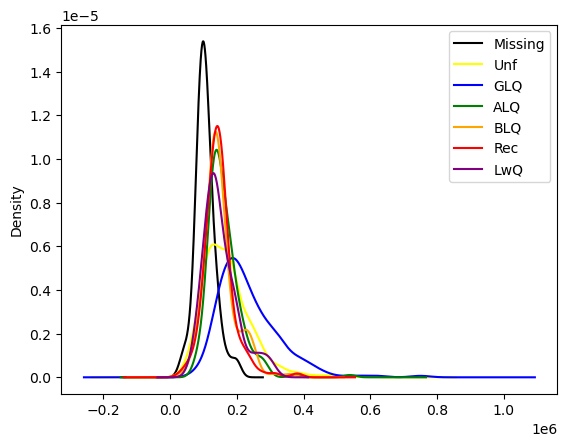

In [177]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_categories[dataset_categories['BsmtFinType1'].isnull()]['SalePrice'].plot(kind="kde", color="black", label="Missing")
dataset_categories[dataset_categories['BsmtFinType1'] == 'Unf']['SalePrice'].plot(kind="kde", color="yellow", label="Unf")
dataset_categories[dataset_categories['BsmtFinType1'] == 'GLQ']['SalePrice'].plot(kind="kde", color="blue", label="GLQ")
dataset_categories[dataset_categories['BsmtFinType1'] == 'ALQ']['SalePrice'].plot(kind="kde", color="green", label="ALQ")
dataset_categories[dataset_categories['BsmtFinType1'] == 'BLQ']['SalePrice'].plot(kind="kde", color="orange", label="BLQ")
dataset_categories[dataset_categories['BsmtFinType1'] == 'Rec']['SalePrice'].plot(kind="kde", color="red", label="Rec")
dataset_categories[dataset_categories['BsmtFinType1'] == 'LwQ']['SalePrice'].plot(kind="kde", color="purple", label="LwQ")
ax.legend()
plt.show()

In [178]:
dataset_categories['BsmtFinType1'].fillna('Rec', inplace=True) #imputación de variable categorica.

C:\Users\Jose L\AppData\Local\Temp\ipykernel_10916\3566920113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['BsmtFinType1'].fillna('Rec', inplace=True) #imputación de variable categorica.


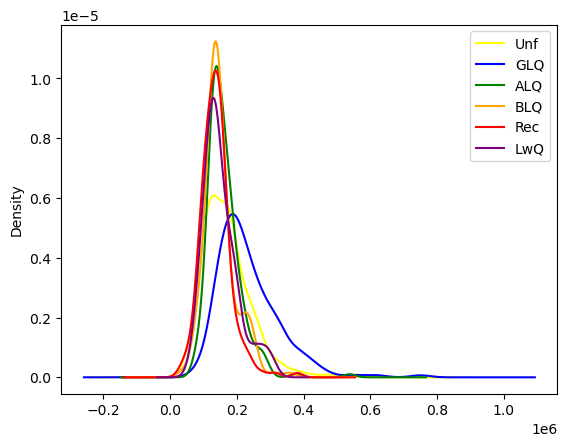

In [181]:
fig = plt.figure()
ax = fig.add_subplot(111)

#dataset_categories[dataset_categories['BsmtFinType1'].isnull()]['SalePrice'].plot(kind="kde", color="black", label="Missing")
dataset_categories[dataset_categories['BsmtFinType1'] == 'Unf']['SalePrice'].plot(kind="kde", color="yellow", label="Unf")
dataset_categories[dataset_categories['BsmtFinType1'] == 'GLQ']['SalePrice'].plot(kind="kde", color="blue", label="GLQ")
dataset_categories[dataset_categories['BsmtFinType1'] == 'ALQ']['SalePrice'].plot(kind="kde", color="green", label="ALQ")
dataset_categories[dataset_categories['BsmtFinType1'] == 'BLQ']['SalePrice'].plot(kind="kde", color="orange", label="BLQ")
dataset_categories[dataset_categories['BsmtFinType1'] == 'Rec']['SalePrice'].plot(kind="kde", color="red", label="Rec")
dataset_categories[dataset_categories['BsmtFinType1'] == 'LwQ']['SalePrice'].plot(kind="kde", color="purple", label="LwQ")
ax.legend()
plt.show()

### Converir la categoria a tipo numerico

In [182]:
dataset_categories['BsmtFinType1'].value_counts().sort_values(ascending=False)

Unf    430
GLQ    418
ALQ    220
Rec    170
BLQ    148
LwQ     74
Name: BsmtFinType1, dtype: int64

In [183]:
BsmtFinType1_freq_mapper = (datasettarea['BsmtFinType1'].value_counts().sort_values(ascending=False)).to_dict()
BsmtFinType1_freq_mapper

{'Unf': 430, 'GLQ': 418, 'ALQ': 220, 'BLQ': 148, 'Rec': 133, 'LwQ': 74}

In [184]:
datasettarea['BsmtFinType1_code'] = datasettarea['BsmtFinType1'].map(BsmtFinType1_freq_mapper)
datasettarea[['BsmtFinType1', 'BsmtFinType1_code']]

C:\Users\Jose L\AppData\Local\Temp\ipykernel_10916\3560130324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasettarea['BsmtFinType1_code'] = datasettarea['BsmtFinType1'].map(BsmtFinType1_freq_mapper)


,BsmtFinType1,BsmtFinType1_code
0,GLQ,418.0
1,ALQ,220.0
2,GLQ,418.0
3,ALQ,220.0
4,GLQ,418.0
...,...,...
1455,Unf,430.0
1456,ALQ,220.0
1457,GLQ,418.0
1458,GLQ,418.0


# Imputación Categórica BsmtFinType2

In [185]:
datasettarea['BsmtFinType2'].value_counts()/len(datasettarea)

Unf    0.860274
Rec    0.036986
LwQ    0.031507
BLQ    0.022603
ALQ    0.013014
GLQ    0.009589
Name: BsmtFinType2, dtype: float64

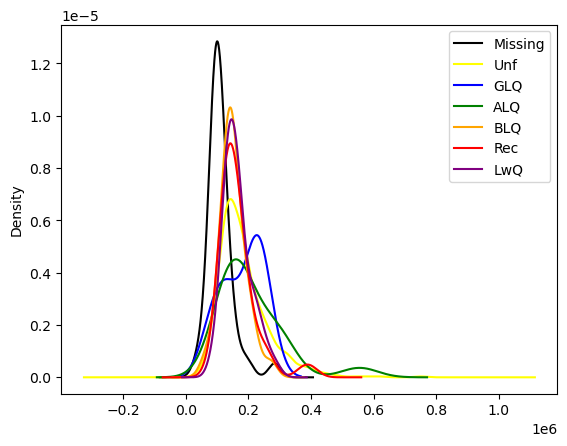

In [186]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_categories[dataset_categories['BsmtFinType2'].isnull()]['SalePrice'].plot(kind="kde", color="black", label="Missing")
dataset_categories[dataset_categories['BsmtFinType2'] == 'Unf']['SalePrice'].plot(kind="kde", color="yellow", label="Unf")
dataset_categories[dataset_categories['BsmtFinType2'] == 'GLQ']['SalePrice'].plot(kind="kde", color="blue", label="GLQ")
dataset_categories[dataset_categories['BsmtFinType2'] == 'ALQ']['SalePrice'].plot(kind="kde", color="green", label="ALQ")
dataset_categories[dataset_categories['BsmtFinType2'] == 'BLQ']['SalePrice'].plot(kind="kde", color="orange", label="BLQ")
dataset_categories[dataset_categories['BsmtFinType2'] == 'Rec']['SalePrice'].plot(kind="kde", color="red", label="Rec")
dataset_categories[dataset_categories['BsmtFinType2'] == 'LwQ']['SalePrice'].plot(kind="kde", color="purple", label="LwQ")
ax.legend()
plt.show()

In [188]:
dataset_categories['BsmtFinType2'].fillna('BLQ', inplace=True) #imputación de variable categorica.

C:\Users\Jose L\AppData\Local\Temp\ipykernel_10916\991372148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['BsmtFinType2'].fillna('BLQ', inplace=True) #imputación de variable categorica.


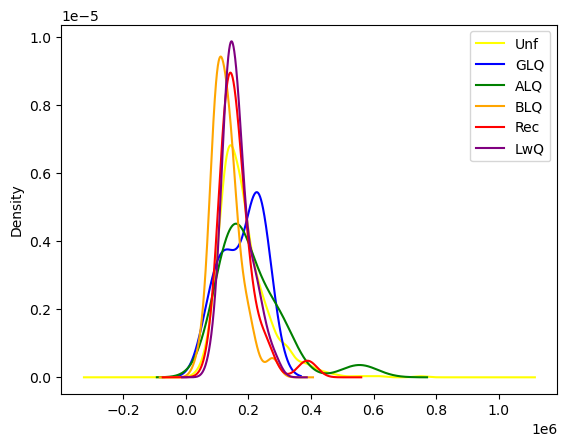

In [190]:
fig = plt.figure()
ax = fig.add_subplot(111)

#dataset_categories[dataset_categories['BsmtFinType2'].isnull()]['SalePrice'].plot(kind="kde", color="black", label="Missing")
dataset_categories[dataset_categories['BsmtFinType2'] == 'Unf']['SalePrice'].plot(kind="kde", color="yellow", label="Unf")
dataset_categories[dataset_categories['BsmtFinType2'] == 'GLQ']['SalePrice'].plot(kind="kde", color="blue", label="GLQ")
dataset_categories[dataset_categories['BsmtFinType2'] == 'ALQ']['SalePrice'].plot(kind="kde", color="green", label="ALQ")
dataset_categories[dataset_categories['BsmtFinType2'] == 'BLQ']['SalePrice'].plot(kind="kde", color="orange", label="BLQ")
dataset_categories[dataset_categories['BsmtFinType2'] == 'Rec']['SalePrice'].plot(kind="kde", color="red", label="Rec")
dataset_categories[dataset_categories['BsmtFinType2'] == 'LwQ']['SalePrice'].plot(kind="kde", color="purple", label="LwQ")
ax.legend()
plt.show()

### Converir la categoria a tipo numerico

In [189]:
dataset_categories['BsmtFinType2'].value_counts().sort_values(ascending=False)

Unf    1256
BLQ      71
Rec      54
LwQ      46
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [191]:
BsmtFinType2_freq_mapper = (datasettarea['BsmtFinType2'].value_counts().sort_values(ascending=False)).to_dict()
BsmtFinType2_freq_mapper

{'Unf': 1256, 'Rec': 54, 'LwQ': 46, 'BLQ': 33, 'ALQ': 19, 'GLQ': 14}

In [192]:
datasettarea['BsmtFinType2_code'] = datasettarea['BsmtFinType2'].map(BsmtFinType2_freq_mapper)
datasettarea[['BsmtFinType2', 'BsmtFinType2_code']]

C:\Users\Jose L\AppData\Local\Temp\ipykernel_10916\372984692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasettarea['BsmtFinType2_code'] = datasettarea['BsmtFinType2'].map(BsmtFinType2_freq_mapper)


,BsmtFinType2,BsmtFinType2_code
0,Unf,1256.0
1,Unf,1256.0
2,Unf,1256.0
3,Unf,1256.0
4,Unf,1256.0
...,...,...
1455,Unf,1256.0
1456,Rec,54.0
1457,Unf,1256.0
1458,Rec,54.0


# Imputación Categórica Electrical

In [197]:
datasettarea['Electrical'].value_counts()/len(datasettarea)

SBrkr    0.913699
FuseA    0.064384
FuseF    0.018493
FuseP    0.002055
Mix      0.000685
Name: Electrical, dtype: float64

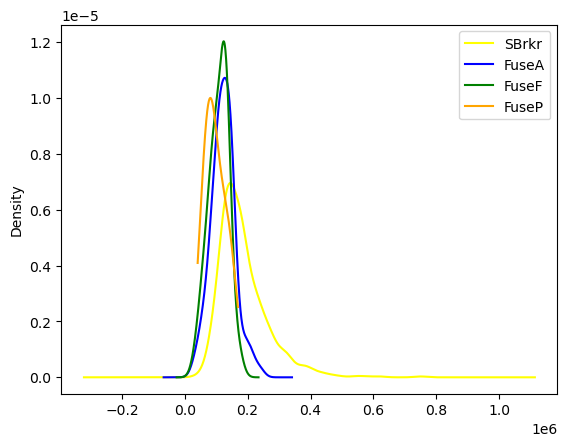

In [203]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_categories[dataset_categories['Electrical'] == 'SBrkr']['SalePrice'].plot(kind="kde", color="yellow", label="SBrkr")
dataset_categories[dataset_categories['Electrical'] == 'FuseA']['SalePrice'].plot(kind="kde", color="blue", label="FuseA")
dataset_categories[dataset_categories['Electrical'] == 'FuseF']['SalePrice'].plot(kind="kde", color="green", label="FuseF")
dataset_categories[dataset_categories['Electrical'] == 'FuseP']['SalePrice'].plot(kind="kde", color="orange", label="FuseP")
ax.legend()
plt.show()

In [204]:
dataset_categories['Electrical'].fillna('SBrkr', inplace=True) #imputación de variable categorica.

C:\Users\Jose L\AppData\Local\Temp\ipykernel_10916\943150124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['Electrical'].fillna('SBrkr', inplace=True) #imputación de variable categorica.


### La imputacion fue unicamente de un dato 

### Converir la categoria a tipo numerico

In [205]:
dataset_categories['Electrical'].value_counts().sort_values(ascending=False)

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [206]:
Electrical_freq_mapper = (datasettarea['Electrical'].value_counts().sort_values(ascending=False)).to_dict()
Electrical_freq_mapper

{'SBrkr': 1334, 'FuseA': 94, 'FuseF': 27, 'FuseP': 3, 'Mix': 1}

In [207]:
datasettarea['Electrical_code'] = datasettarea['Electrical'].map(Electrical_freq_mapper)
datasettarea[['Electrical', 'Electrical_code']]

C:\Users\Jose L\AppData\Local\Temp\ipykernel_10916\553751207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasettarea['Electrical_code'] = datasettarea['Electrical'].map(Electrical_freq_mapper)


,Electrical,Electrical_code
0,SBrkr,1334.0
1,SBrkr,1334.0
2,SBrkr,1334.0
3,SBrkr,1334.0
4,SBrkr,1334.0
...,...,...
1455,SBrkr,1334.0
1456,SBrkr,1334.0
1457,SBrkr,1334.0
1458,FuseA,94.0
